# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $a_1(0) + a_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $a_1(1) + a_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P1 = [0, 1]
P2 = [1, 0]

X = np.array([[1, 0], [1, 1]])
y = np.array([1, 0])
b0, b1 = np.linalg.inv(X).dot(y)
b0, b1

(1.0, -1.0)

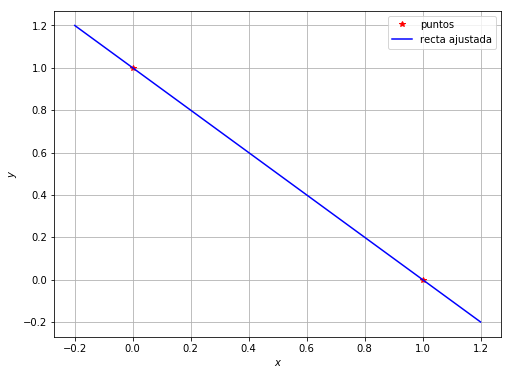

In [3]:
x = np.linspace(-0.2, 1.2, 100)
y = b1*x+b0

plt.figure(figsize=(8,6))
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'r*', label = 'puntos')
plt.plot(x, y, 'b', label = 'recta ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [4]:
P1 = [-1, 1]
P2 = [0, 0]
P3 = [1, 1]

X = np.array([[1, -1, 1], [1, 0, 0], [1, 1, 1]])
y = np.array([1, 0, 1])
b0, b1, b2 = np.linalg.inv(X).dot(y)
b0, b1, b2

(0.0, 0.0, 1.0)

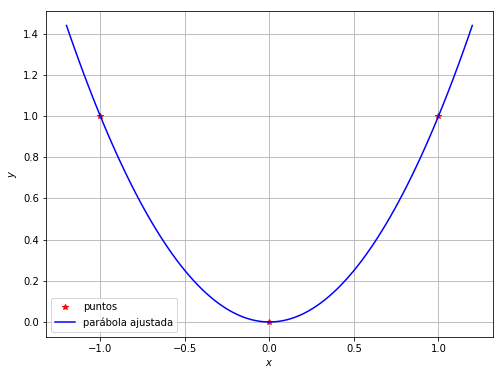

In [5]:
x = np.linspace(-1.2, 1.2, 100)
y = b2*x**2+b1*x+b0

plt.figure(figsize=(8,6))
plt.plot([P1[0], P2[0], P3[0]], [P1[1], P2[1], P3[1]], 'r*', label = 'puntos')
plt.plot(x, y, 'b', label = 'parábola ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

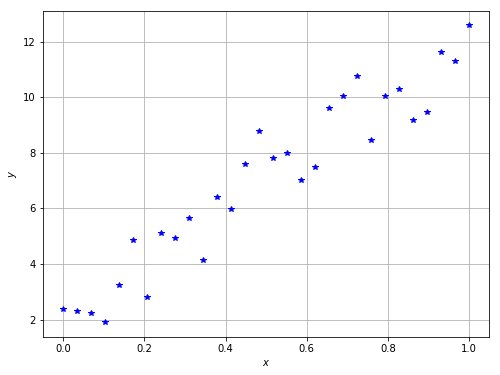

In [6]:
x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [7]:
import scipy.optimize as opt

In [8]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [9]:
def fun_obj1(b, x, y):
    return np.sum((y-b[0]-b[1]*x)**2)

def fun_obj2(b, x, y):
    X = np.array([x**i for i in range(2)]).T
    return np.linalg.norm(y-X.dot(b))**2

b0 = np.array([1, 5])

Con esto, evaluamos la optimización...

In [10]:
res = opt.minimize(fun_obj1, b0, args = (x, y))
res

      fun: 25.26540831946204
 hess_inv: array([[ 0.06347405, -0.09358891],
       [-0.09358891,  0.18714624]])
      jac: array([  7.15255737e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 2.11301323,  9.90697381])

¿Qué tan bien luce el ajuste?

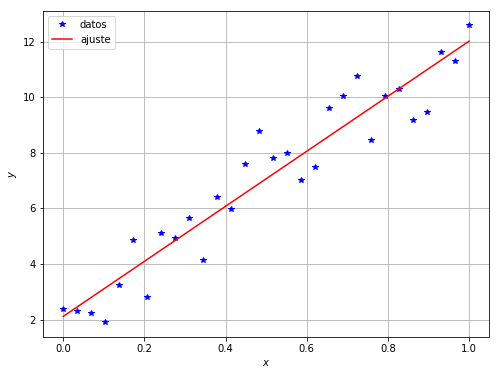

In [11]:
yhat = res.x[0]+res.x[1]*x

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [74]:
res.x

array([ 2.18826637,  9.79916428])

Note que la pendiente es aproximadamente $10$ y el intercepto es aproximadamente $2$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

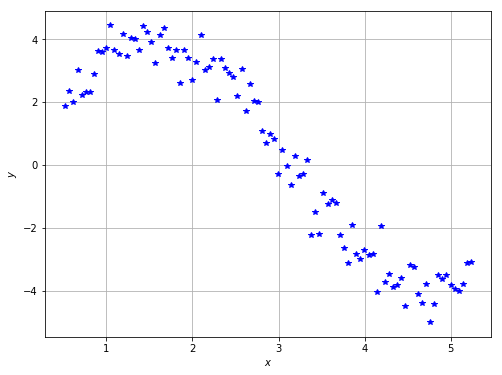

In [12]:
n = 100
x = np.linspace(np.pi/6, 5*np.pi/3, n)
y = 4*np.sin(x) + 0.5*np.random.randn(n)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

¿Se ajustará bien una recta?

In [13]:
def obj1(b, x, y):
    return np.sum((y-b[0]-b[1]*x)**2)

b0 = np.random.random((2,))

In [14]:
res = opt.minimize(obj1, b0, args=(x,y))
res

      fun: 140.75010717221312
 hess_inv: array([[ 0.0269637 , -0.00762683],
       [-0.00762683,  0.0026484 ]])
      jac: array([  0.00000000e+00,   1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 6.23450524, -2.04976423])

### Veamos $\beta$ para el ajuste con recta

In [15]:
res.x

array([ 6.23450524, -2.04976423])

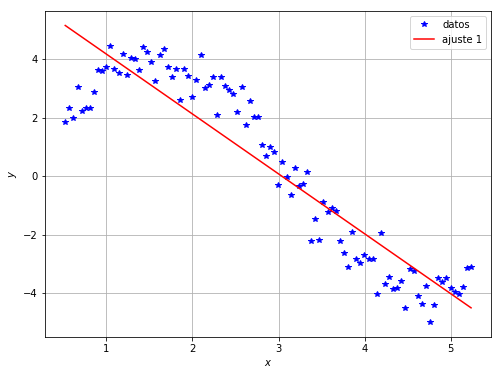

In [16]:
yhat1 = res.x[0]+res.x[1]*x

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

Creo que no. Pero, ¿Y una parábola?

In [17]:
def obj2(b, x, y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2)**2)

b0 = np.random.random((3,))

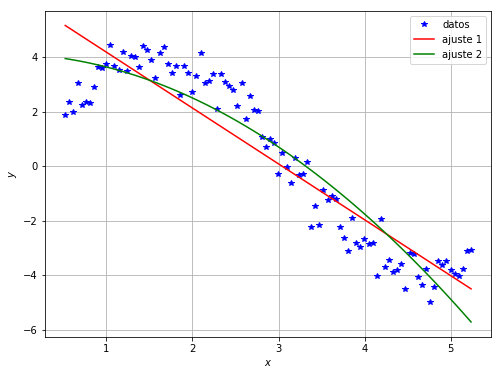

In [18]:
res = opt.minimize(obj2, b0, args=(x,y))
yhat2 = res.x[0]+res.x[1]*x+res.x[2]*x**2

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### Veamos $\beta$ para el ajuste con parábola

In [19]:
res.x

array([ 4.11126297, -0.14055653, -0.33148347])

Tampoco. Quizá un polinomio cúbico...

In [20]:
def obj3(b, x, y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2-b[3]*x**3)**2)

b0 = np.random.random((4,))

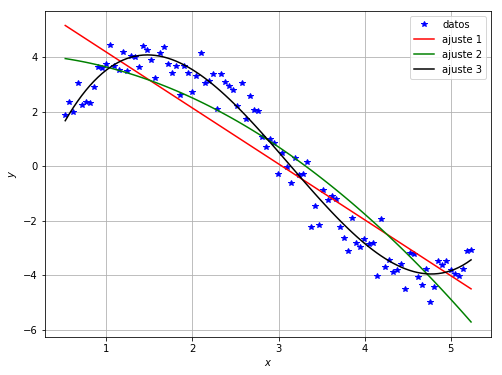

In [21]:
res = opt.minimize(obj3, b0, args=(x,y))
yhat3 = res.x[0]+res.x[1]*x+res.x[2]*x**2+res.x[3]*x**3

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.plot(x, yhat3, '-k', label = 'ajuste 3')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### Veamos $\beta$ para el ajuste con cúbica

In [22]:
res.x

array([-2.21762252,  9.50328982, -4.20996963,  0.44893109])

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

**¡Cuidado! OVERFITTING...**

In [23]:
def obj7(b, x, y):
    return np.sum((y-np.array([x**i for i in range(8)]).T.dot(b))**2)

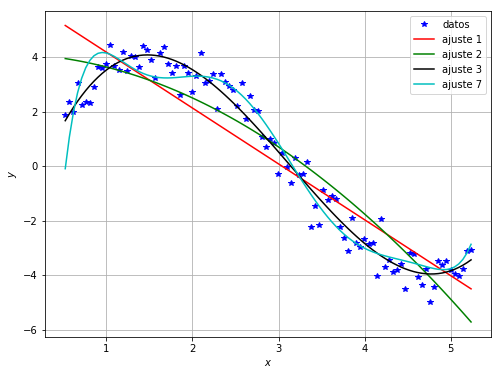

In [30]:
b0 = np.random.random((8,))
res = opt.minimize(obj7, b0, args=(x,y))
yhat7 = np.array([x**i for i in range(8)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.plot(x, yhat3, '-k', label = 'ajuste 3')
plt.plot(x, yhat7, '-c', label = 'ajuste 7')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### De nuevo, veamos $\beta$

In [31]:
res.x

array([ -4.33362950e+01,   1.67749990e+02,  -2.33361671e+02,
         1.65462515e+02,  -6.51090377e+01,   1.43143392e+01,
        -1.64522934e+00,   7.70509354e-02])

**¡Cuidado!** ver el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

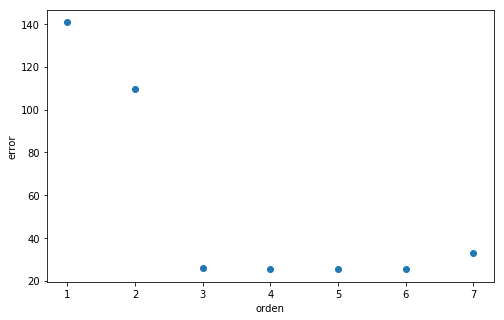

In [32]:
e_ms = []
def obj(b, x, y, n):
    return np.sum((y-np.array([x**i for i in range(n+1)]).T.dot(b))**2)

for i in range(7):
    b0 = np.random.random((i+2,))
    res = opt.minimize(obj, b0, args=(x,y,i+1))
    yhat = np.array([x**j for j in range(i+2)]).T.dot(res.x)
    e_ms.append(sum((y - yhat)**2))
    
plt.figure(figsize=(8,5))
plt.plot(np.arange(7)+1, e_ms, 'o')
plt.xlabel('orden')
plt.ylabel('error')
plt.show()

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

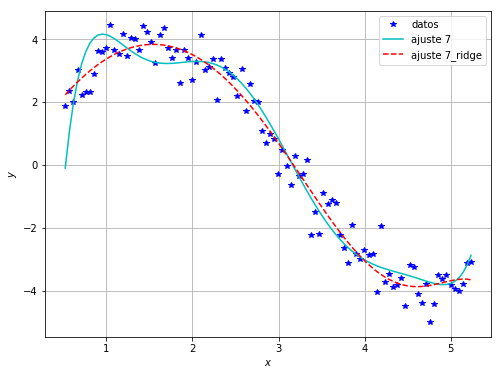

In [40]:
def obj_ridge(b, x, y, n, l):
    return np.sum((y-np.array([x**i for i in range(n+1)]).T.dot(b))**2)+l*np.linalg.norm(b)**2

b0 = np.random.random((8,))
res = opt.minimize(obj_ridge, b0, args=(x,y,7,0.1))
yhat7_ridge = np.array([x**j for j in range(8)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat7, '-c', label = 'ajuste 7')
plt.plot(x, yhat7_ridge, '--r', label = 'ajuste 7_ridge')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [41]:
res.x

array([ 0.5026245 ,  3.28352194,  0.98704989, -2.28730795,  1.21132296,
       -0.37679997,  0.06229404, -0.00399712])

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

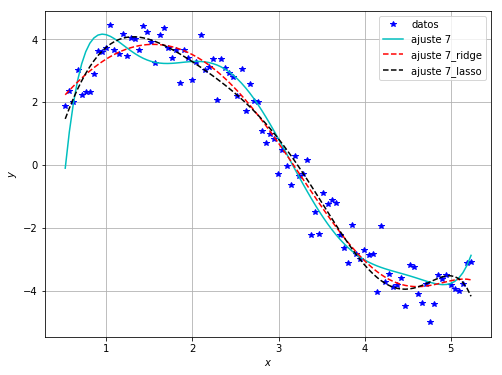

In [44]:
def obj_lasso(b, x, y, n, l):
    return np.sum((y-np.array([x**i for i in range(n+1)]).T.dot(b))**2)+l*np.linalg.norm(b,1)

b0 = np.random.random((8,))
res = opt.minimize(obj_lasso, b0, args=(x,y,7,0.1))
yhat7_lasso = np.array([x**j for j in range(8)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat7, '-c', label = 'ajuste 7')
plt.plot(x, yhat7_ridge, '--r', label = 'ajuste 7_ridge')
plt.plot(x, yhat7_lasso, '--k', label = 'ajuste 7_lasso')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [45]:
res.x

array([ -3.21135186,   8.62257975,   6.08064711, -14.48419971,
         9.10441424,  -2.73638548,   0.40025084,  -0.02275685])

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

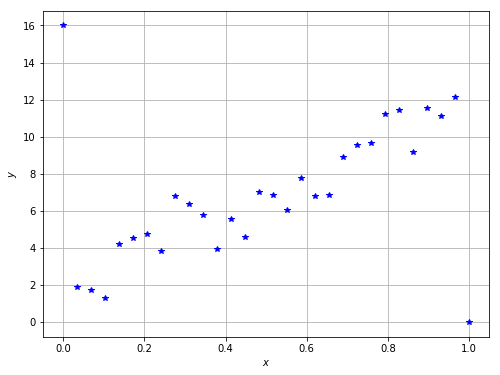

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)

y[0] = 16
y[-1] = 0


plt.figure(figsize=(8,6))
plt.plot(x, y, '*b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

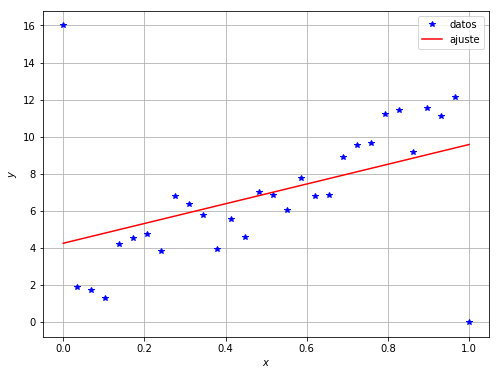

In [47]:
b0 = np.random.random((2,))
res = opt.minimize(obj, b0, args=(x,y,1))
yhat = np.array([x**j for j in range(2)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [48]:
res.x

array([ 4.24831492,  5.32766541])

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es *ajuste robusto*.

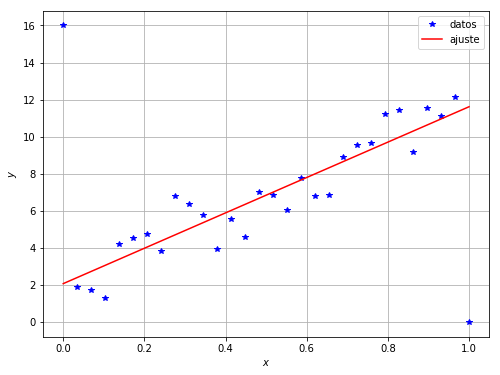

In [49]:
def huber(a, d):
    if np.abs(a)<=d:
        return a**2
    else:
        return d*(2*np.abs(a)-d)

def obj_robust(b, x, y, n, d):
    return np.sum(np.vectorize(huber)(y-np.array([x**i for i in range(n+1)]).T.dot(b), 1.345))

b0 = np.random.random((2,))
res = opt.minimize(obj_robust, b0, args=(x,y,1,1.345))
yhat = np.array([x**j for j in range(2)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-r', label = 'ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [50]:
res.x

array([ 2.06976499,  9.54510922])

Mejor...

## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 7 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado de polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.001.
4. Comparar los beta.

Abrir un nuevo notebook, llamado `Tarea7_ApellidoNombre` y subirlo a moodle en el espacio habilitado. Si no terminan esto en clase, tienen hasta mañana a las 23:00.

In [30]:
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

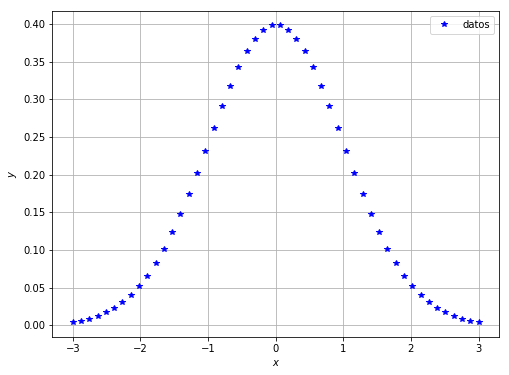

In [31]:
x = np.linspace(-3, 3)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>